In [83]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
plt.style.use('fivethirtyeight')
%matplotlib inline
warnings.filterwarnings('ignore')

In [84]:
train_data= pd.read_csv('tested[1].csv')
test_data = pd.read_csv('tested[1].csv')

In [85]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [86]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent_1 = train_data.isnull().sum()/train_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
PassengerId,0,0.0
Survived,0,0.0


In [87]:
train_data.dropna(subset=['Age'], inplace=True)
train_data.fillna({'Embarked': 'S'}, inplace=True)

In [88]:
train_data.head( 8   )

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S


In [89]:
le = LabelEncoder()
train_data['Sex'] = le.fit_transform(train_data['Sex'])
train_data['Embarked'] = le.fit_transform(train_data['Embarked'])


In [90]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_data[features]
y = train_data['Survived']

In [91]:
train_data.head( 8   )

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2
5,897,0,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,NaN,2
6,898,1,3,"Connolly, Miss. Kate",0,30.0,0,0,330972,7.6292,NaN,1
7,899,0,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,29.0000,NaN,2


In [92]:
train_data.shape

(332, 12)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [94]:
train_data.columns.values


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [95]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 415
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  332 non-null    int64  
 1   Survived     332 non-null    int64  
 2   Pclass       332 non-null    int64  
 3   Name         332 non-null    object 
 4   Sex          332 non-null    int32  
 5   Age          332 non-null    float64
 6   SibSp        332 non-null    int64  
 7   Parch        332 non-null    int64  
 8   Ticket       332 non-null    object 
 9   Fare         331 non-null    float64
 10  Cabin        87 non-null     object 
 11  Embarked     332 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(3)
memory usage: 31.1+ KB


In [96]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          245
Embarked         0
dtype: int64

In [97]:
train_data.head( 8   )

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2
5,897,0,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,NaN,2
6,898,1,3,"Connolly, Miss. Kate",0,30.0,0,0,330972,7.6292,NaN,1
7,899,0,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,29.0000,NaN,2


In [98]:
train_data["Age"] = train_data["Age"].fillna(-0.5)
test_data["Age"] = test_data["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager',
          'Student', 'Young Adult', 'Adult', 'Senior']
train_data['AgeGroup'] = pd.cut(train_data["Age"], bins, labels=labels)
test_data['AgeGroup'] = pd.cut(test_data["Age"], bins, labels=labels)

In [99]:
train_data.head(    )

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1,Young Adult
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2,Adult
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1,Senior
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2,Young Adult
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2,Student


In [100]:
combine = [train_data, test_data]

In [101]:
train_data.head(    )

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1,Young Adult
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2,Adult
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1,Senior
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2,Young Adult
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2,Student


In [102]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
409,1301,1,3,"Peacock, Miss. Treasteall",0,3.0,1,1,SOTON/O.Q. 3101315,13.775,NaN,2,Baby
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,37.0,1,0,19928,90.000,C78,1,Adult
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",0,28.0,0,0,347086,7.775,NaN,2,Young Adult
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.900,C105,0,Adult
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.250,NaN,2,Adult


In [103]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
  

In [104]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1,Young Adult,Mr
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2,Adult,Mrs
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1,Senior,Mr
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2,Young Adult,Mr
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2,Student,Mrs


In [105]:
pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,0,1
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,17
Miss,64,0
Mr,0,183
Mrs,62,0
Rev,0,2


In [106]:
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Col,0.0
1,Dona,1.0
2,Dr,0.0
3,Master,0.0
4,Miss,1.0
5,Mr,0.0
6,Mrs,1.0
7,Rev,0.0


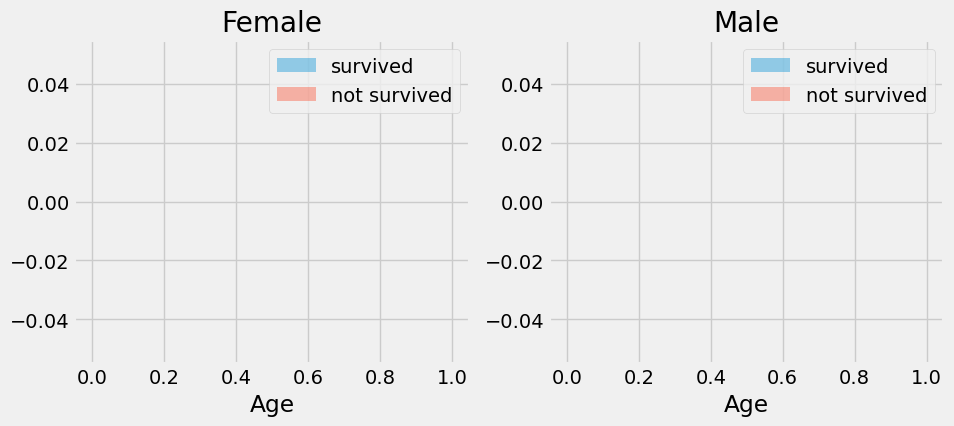

In [107]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_data[train_data['Sex']=='female']
men = train_data[train_data['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

<Axes: xlabel='Pclass', ylabel='Survived'>

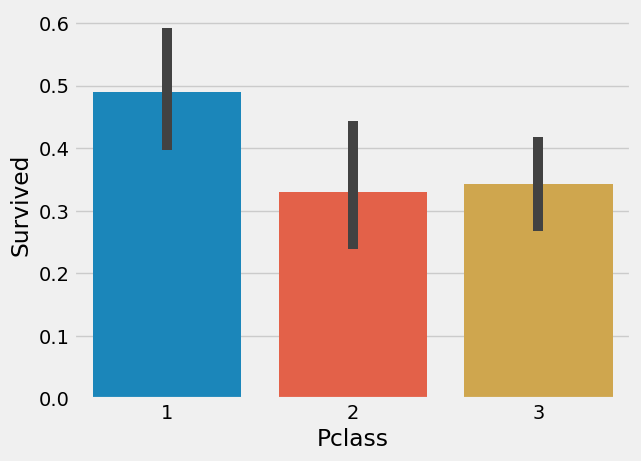

In [108]:
sns.barplot(x='Pclass', y='Survived', data=train_data)

In [109]:
data = [train_data, test_data]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_data['not_alone'].value_counts()

1    186
0    146
Name: not_alone, dtype: int64

In [110]:
train_data = train_data.drop(['PassengerId'], axis=1)

In [111]:
ata = [train_data, test_data]

for dataset in data:
    mean = train_data["Age"].mean()
    std = test_data["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_data["Age"].astype(int)
train_data["Age"].isnull().sum()

0

In [112]:
train_data['Embarked'].describe()


count    332.000000
mean       1.439759
std        0.861733
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: Embarked, dtype: float64

In [113]:
common_value = 'S'
data = [train_data, test_data]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [114]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 415
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Survived   332 non-null    int64   
 1   Pclass     332 non-null    int64   
 2   Name       332 non-null    object  
 3   Sex        332 non-null    int32   
 4   Age        332 non-null    float64 
 5   SibSp      332 non-null    int64   
 6   Parch      332 non-null    int64   
 7   Ticket     332 non-null    object  
 8   Fare       331 non-null    float64 
 9   Cabin      87 non-null     object  
 10  Embarked   332 non-null    int32   
 11  AgeGroup   332 non-null    category
 12  Title      332 non-null    object  
 13  relatives  332 non-null    int64   
 14  not_alone  332 non-null    int32   
dtypes: category(1), float64(2), int32(3), int64(5), object(4)
memory usage: 43.8+ KB


In [115]:
data = [train_data, test_data]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_data = train_data.drop(['Name'], axis=1)
test_data= test_data.drop(['Name'], axis=1)

In [116]:
genders = {"male": 0, "female": 1}
data = [train_data, test_data]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [117]:
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,relatives,not_alone
0,0,3,NaN,34.5,0,0,330911,7.8292,NaN,1,Young Adult,1,0,1
1,1,3,NaN,47.0,1,0,363272,7.0000,NaN,2,Adult,3,1,0
2,0,2,NaN,62.0,0,0,240276,9.6875,NaN,1,Senior,1,0,1
3,0,3,NaN,27.0,0,0,315154,8.6625,NaN,2,Young Adult,1,0,1
4,1,3,NaN,22.0,1,1,3101298,12.2875,NaN,2,Student,3,2,0
5,0,3,NaN,14.0,0,0,7538,9.2250,NaN,2,Teenager,1,0,1
6,1,3,NaN,30.0,0,0,330972,7.6292,NaN,1,Young Adult,2,0,1
7,0,2,NaN,26.0,1,1,248738,29.0000,NaN,2,Young Adult,1,2,0
8,1,3,NaN,18.0,0,0,2657,7.2292,NaN,0,Teenager,3,0,1
9,0,3,NaN,21.0,2,0,A/4 48871,24.1500,NaN,2,Student,1,2,0
